In [1]:
!apt-get install -y xvfb 
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')  
os.environ['DISPLAY']=':1.0'

%matplotlib inline
!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 784 kB in 0s (8,273 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.9_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.9) ...
Setting up xvfb (2:1.19.6-1ubuntu4.9) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newest version (3.6.9-1~18.04).
The following additional packages will be installed:
  fonts-droid-

In [2]:
import nltk
from IPython.display import display
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
from nltk.grammar import CFG
from nltk.parse.chart import ChartParser, BU_LC_STRATEGY

In [5]:
grammar = CFG.fromstring("""
S -> T1 T4
T1 -> NNP VBZ
T2 -> DT NN
T3 -> IN NNP
T4 -> T3 | T2 T3
NNP -> 'Tajmahal' | 'Agra' | 'Bangalore' | 'Karnataka' | "Seoul" | "Korea"
VBZ -> 'is'
IN -> 'in' | 'of'
DT -> 'the'
NN -> 'capital'
""")

cp = ChartParser(grammar, BU_LC_STRATEGY, trace=True)

In [6]:
sentence = "Seoul is the capital of Korea"
tokens = sentence.split()
chart = cp.chart_parse(tokens)
parses = list(chart.parses(grammar.start()))

|.Seoul .  is  . the  .capita.  of  .Korea .|
|[------]      .      .      .      .      .| [0:1] 'Seoul'
|.      [------]      .      .      .      .| [1:2] 'is'
|.      .      [------]      .      .      .| [2:3] 'the'
|.      .      .      [------]      .      .| [3:4] 'capital'
|.      .      .      .      [------]      .| [4:5] 'of'
|.      .      .      .      .      [------]| [5:6] 'Korea'
|[------]      .      .      .      .      .| [0:1] NNP -> 'Seoul' *
|[------>      .      .      .      .      .| [0:1] T1 -> NNP * VBZ
|.      [------]      .      .      .      .| [1:2] VBZ -> 'is' *
|[-------------]      .      .      .      .| [0:2] T1 -> NNP VBZ *
|[------------->      .      .      .      .| [0:2] S  -> T1 * T4
|.      .      [------]      .      .      .| [2:3] DT -> 'the' *
|.      .      [------>      .      .      .| [2:3] T2 -> DT * NN
|.      .      .      [------]      .      .| [3:4] NN -> 'capital' *
|.      .      [-------------]      .      .| [2:4] T2 -> DT 

In [7]:
print("Total Edges :", len(chart.edges()))

Total Edges : 24


(S
  (T1 (NNP Seoul) (VBZ is))
  (T4 (T2 (DT the) (NN capital)) (T3 (IN of) (NNP Korea))))


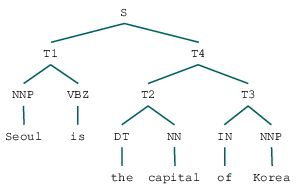

In [8]:
for tree in parses: 
  print(tree)
#   tree.draw()
  display(tree)